## DS - 3001 Final Project: A Look into Healthcare System Capacity
#### Amanda Lin, Courtney Nguyen, Cole Blanton, Emaan Qillawala

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.calibration import LabelEncoder

### 1. Question and background information on the data and why you are asking this question(s).  References to previous research/evidence generally would be nice to include.

### **Question Problem:** The CDC must determine the national healthcare system’s capacity to handle the COVID-19 pandemic and its severity. They would like to determine whether or not a county’s healthcare system capacity (the number of occupied beds) is at high occupancy (seen at 0.7 or more) based on county population, state, number of staffed beds per 1000 people, licensed all beds, etc.


In [356]:
covid = pd.read_csv("/Users/courtneynguyen2/Documents/myDS-3001/covid.csv")
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips_code                                   2537 non-null   int64  
 1   State                                       2537 non-null   object 
 2   County Name                                 2537 non-null   object 
 3   Staffed All Beds                            2537 non-null   float64
 4   Staffed ICU Beds                            2537 non-null   float64
 5   Licensed All Beds                           2537 non-null   float64
 6   All Bed Occupancy Rate                      2460 non-null   float64
 7   ICU Bed Occupancy Rate                      1410 non-null   float64
 8   Population                                  2537 non-null   float64
 9   Population (20+)                            2537 non-null   float64
 10  Population (

### **Clean Data** 

#### Drop Variables and NAs

In [357]:
covid = covid.drop(columns=['Staffed ICU Beds', 'ICU Bed Occupancy Rate', 'Staffed ICU Beds [Per 1000 People]', 'Staffed ICU Beds [Per 1000 Adults (20+)]', 'Staffed ICU Beds [Per 1000 Elderly (65+)]','ICU Bed Source', 'ICU Bed Source Last Updated'])
covid = covid.dropna()

### 2. Exploratory Data Analysis – Initial summary statistics and graphs with an emphasis on variables you believe to be important for your analysis.

### **Target Variable:** All Bed Occupancy Rate

In [358]:
covid.head()

,fips_code,State,County Name,Staffed All Beds,Licensed All Beds,All Bed Occupancy Rate,Population,Population (20+),Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Licensed All Beds [Per 1000 People],Licensed All Beds [Per 1000 Adults (20+)],Licensed All Beds [Per 1000 Elderly (65+)]
1,2020,AK,Anchorage,979.0,1149.0,0.66,291538.0,213508.0,32333.0,3.358,4.585,30.279,3.941,5.382,35.536
2,2050,AK,Bethel,34.0,37.0,0.40,18216.0,11082.0,1402.0,1.866,3.068,24.251,2.031,3.339,26.391
3,2070,AK,Dillingham,18.0,18.0,0.15,5000.0,3278.0,470.0,3.600,5.491,38.298,3.600,5.491,38.298
4,2090,AK,Fairbanks North Star,145.0,175.0,0.46,98971.0,72505.0,10204.0,1.465,2.000,14.210,1.768,2.414,17.150
5,2110,AK,Juneau,45.0,73.0,0.41,32113.0,24525.0,4298.0,1.401,1.835,10.470,2.273,2.977,16.985


### Checking Composition of Data

In [359]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 1 to 2536
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips_code                                   2436 non-null   int64  
 1   State                                       2436 non-null   object 
 2   County Name                                 2436 non-null   object 
 3   Staffed All Beds                            2436 non-null   float64
 4   Licensed All Beds                           2436 non-null   float64
 5   All Bed Occupancy Rate                      2436 non-null   float64
 6   Population                                  2436 non-null   float64
 7   Population (20+)                            2436 non-null   float64
 8   Population (65+)                            2436 non-null   float64
 9   Staffed All Beds [Per 1000 People]          2436 non-null   float64
 10  Staffed All Beds 

#### Value Counts of Counties per State 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


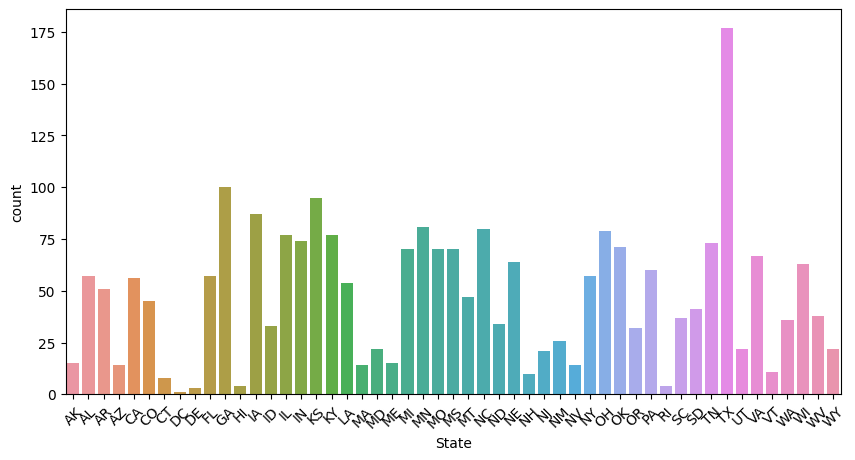

In [360]:
plt.figure(figsize=(10, 5))
chart = sns.countplot( data=covid, x='State')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

### All Bed Occupancy 5 Number Summary Box Plot 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


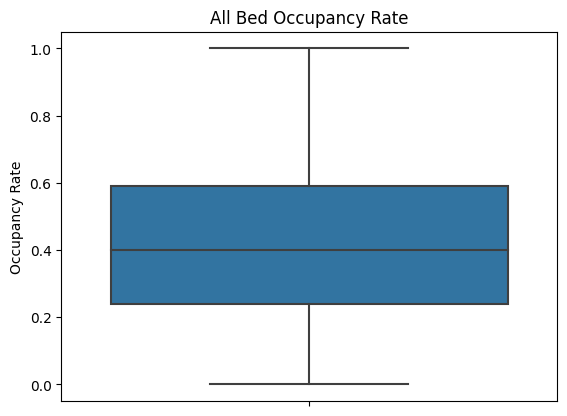

In [361]:
sns.boxplot(y='All Bed Occupancy Rate', data=covid)

plt.title('All Bed Occupancy Rate')
plt.ylabel('Occupancy Rate')
plt.show()

#### Convert Target Var Using High Occupancy Threshold

In [362]:
covid['All Bed Occupancy Rate'] = covid['All Bed Occupancy Rate'].apply(
    lambda x: 'high occupancy' if x > 0.60
    else ('middle occupancy' if x > 0.25
          else 'low occupancy')
)

covid['All Bed Occupancy Rate'].astype('object')

1         high occupancy
2       middle occupancy
3          low occupancy
4       middle occupancy
5       middle occupancy
              ...       
2532       low occupancy
2533    middle occupancy
2534    middle occupancy
2535    middle occupancy
2536    middle occupancy
Name: All Bed Occupancy Rate, Length: 2436, dtype: object

In [363]:
covid['All Bed Occupancy Rate'].value_counts()

All Bed Occupancy Rate
middle occupancy    1231
low occupancy        656
high occupancy       549
Name: count, dtype: int64

### Value Counts of Categorized All Bed Occupancy Rate

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


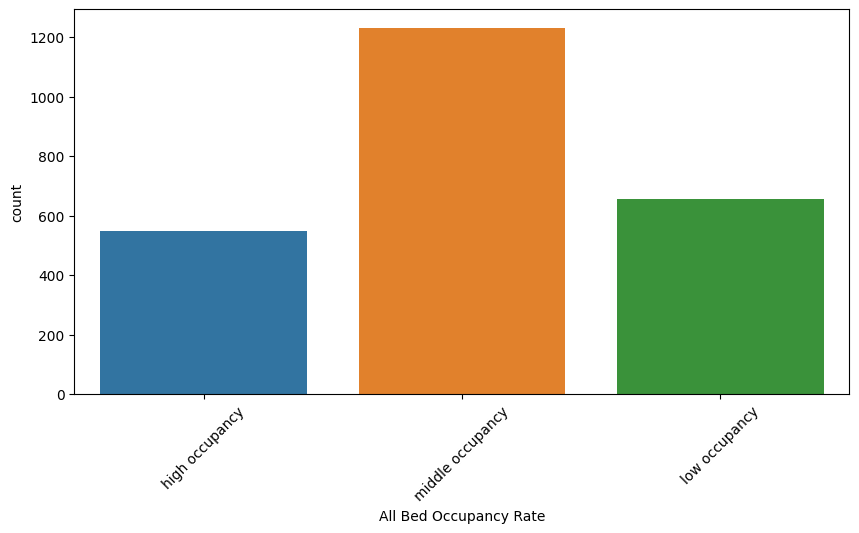

In [364]:
plt.figure(figsize=(10, 5))
chart = sns.countplot(data=covid, x='All Bed Occupancy Rate')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [365]:
covid.describe()

,fips_code,Staffed All Beds,Licensed All Beds,Population,Population (20+),Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Licensed All Beds [Per 1000 People],Licensed All Beds [Per 1000 Adults (20+)],Licensed All Beds [Per 1000 Elderly (65+)]
count,2436.000000,2436.000000,2436.000000,2.436000e+03,2.436000e+03,2.436000e+03,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,30149.147373,332.106322,428.863711,1.296366e+05,9.711367e+04,2.064483e+04,2.665162,3.547758,14.597846,3.453977,4.594261,18.994130
std,14947.143726,1003.550685,1279.834426,3.747552e+05,2.809996e+05,5.350184e+04,2.417202,3.175213,12.894066,3.906481,5.076848,20.905135
min,1001.000000,2.000000,0.000000,1.087000e+03,8.800000e+02,2.540000e+02,0.092000,0.128000,0.493000,0.000000,0.000000,0.000000
25%,19032.000000,25.000000,25.000000,1.550450e+04,1.171075e+04,3.064000e+03,1.291000,1.710500,6.940500,1.588000,2.113750,8.511000
50%,29114.000000,50.000000,76.000000,3.563350e+04,2.688050e+04,6.643500e+03,2.038500,2.720500,11.203000,2.626500,3.506000,14.336000
75%,42089.500000,209.000000,272.250000,9.681875e+04,7.229200e+04,1.637425e+04,3.138000,4.210000,17.792750,4.081500,5.441500,22.717250
max,56045.000000,23071.000000,27400.000000,1.010552e+07,7.658126e+06,1.375957e+06,30.373000,39.077000,155.666000,97.226000,120.423000,463.326000


#### **Normalizing Numeric Vectors**

In [366]:
numeric = covid.select_dtypes(include=['float64']).columns.tolist()
covid[numeric] = MinMaxScaler().fit_transform(covid[numeric])

#### **One-Hot Encoding and Partition Data**

In [367]:
# Drop Target Before One-Hot Encoding 
y = covid['All Bed Occupancy Rate']

covid_1h = covid.drop(columns='All Bed Occupancy Rate')

non_numeric = covid_1h.select_dtypes(include=['object']).columns.tolist()
covid_1h = pd.get_dummies(covid_1h, columns = non_numeric)

covid_1h.head()

X =  covid_1h

### Check Prevelance 

From the prevelance, we understand that at random there is a 21.9% chance of selecting a county with high occupancy rate. 

In [368]:
print(y.value_counts(normalize=True))

All Bed Occupancy Rate
middle occupancy    0.505337
low occupancy       0.269294
high occupancy      0.225369
Name: proportion, dtype: float64


### Partition using train_test_split

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify = y, random_state=21)

### Create Tuning Set

In [370]:
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50, stratify = y_test,random_state=49)

#### **Building the Model**

In [371]:
covid_5NN = KNeighborsClassifier(n_neighbors=5)

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify = y, random_state=21)

In [373]:
covid_5NN.fit(X_train, y_train)

KNeighborsClassifier()

### Fit KNN to training data

In [374]:
print(covid_5NN.score(X_tune, y_tune))

0.47950819672131145


#### Evaluation Metrics

In [375]:
covid_prob1 = covid_5NN.predict_proba(X_tune)
print(covid_prob1[:5]) 

[[0.2 0.  0.8]
 [0.  0.2 0.8]
 [0.6 0.  0.4]
 [0.6 0.  0.4]
 [0.2 0.2 0.6]]


In [376]:
covid_pred1 = covid_5NN.predict(X_tune)
print(covid_pred1)

['middle occupancy' 'middle occupancy' 'high occupancy' 'high occupancy'
 'middle occupancy' 'middle occupancy' 'high occupancy' 'middle occupancy'
 'middle occupancy' 'middle occupancy' 'low occupancy' 'middle occupancy'
 'low occupancy' 'middle occupancy' 'low occupancy' 'high occupancy'
 'middle occupancy' 'high occupancy' 'high occupancy' 'high occupancy'
 'high occupancy' 'middle occupancy' 'middle occupancy' 'middle occupancy'
 'middle occupancy' 'low occupancy' 'middle occupancy' 'low occupancy'
 'low occupancy' 'low occupancy' 'middle occupancy' 'high occupancy'
 'middle occupancy' 'high occupancy' 'high occupancy' 'middle occupancy'
 'middle occupancy' 'middle occupancy' 'middle occupancy'
 'middle occupancy' 'middle occupancy' 'middle occupancy' 'high occupancy'
 'middle occupancy' 'low occupancy' 'middle occupancy' 'middle occupancy'
 'middle occupancy' 'middle occupancy' 'middle occupancy'
 'middle occupancy' 'high occupancy' 'low occupancy' 'low occupancy'
 'high occupancy

In [377]:
final_model= pd.DataFrame({'neg_prob':_prob1[:, 0], 'pred':mushroom_pred1,'target':y_tune, 'pos_prob':mushroom_prob1[:, 1]})
print(final_model.head())

NameError: name '_prob1' is not defined

In [ ]:
print(metrics.confusion_matrix(final_model.target,final_model.pred)) 
print(metrics.ConfusionMatrixDisplay.from_predictions(final_model.target,final_model.pred, display_labels = [False, True], colorbar=False))